# Toy example of inner approximation of feasibles sets

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import time
import numpy as np
import matplotlib.pyplot as plt
from pympc.geometry.polytope import Polytope
from pympc.geometry.convex_hull import PolytopeProjectionInnerApproximation

Create a synthetic feasible set

In [3]:
m = 20
A = np.array([[- np.cos(2. * k * np.pi / m), - np.sin(2. * k * np.pi / m)] for k in range(m)])
b = np.ones((m, 1))
p = Polytope(A, b)
p.assemble()

<pympc.geometry.polytope.Polytope instance at 0x10b32ea28>

First sample

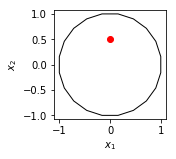

In [4]:
sample_1 = np.array([[.0],[.5]])
fig = plt.figure(figsize=(2.,2.))
p.plot(facecolor='w', label='Exact feasible set')
plt.scatter(sample_1[0,0], sample_1[1,0], color='r', zorder=2)
plt.axis('equal')
fig = plt.gcf()
#fig.savefig("first_sample.pdf", bbox_inches='tight')
plt.show()

Include first point

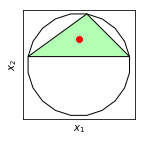

In [5]:
color = np.array([.7,1.,.7])
fig = plt.figure(figsize=(2.,2.))
p_inner = PolytopeProjectionInnerApproximation(A, b, [0,1])
#p_inner_plot = p_inner.include_point(sample_1)[0]
p_inner.include_point(sample_1)
p_inner_plot = Polytope(p_inner.hull.A, p_inner.hull.b)
p_inner_plot.assemble()
p.plot(facecolor='w')
p_inner_plot.plot(facecolor=color)
plt.scatter(sample_1[0,0], sample_1[1,0], color='r', zorder=2)
plt.axis('equal')
plt.xticks([], [])
plt.yticks([], [])
fig = plt.gcf()
#fig.savefig("chm_2.pdf", bbox_inches='tight')
plt.show()

Second sample

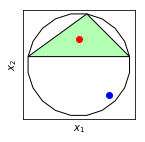

In [6]:
sample_2 = np.array([[.6],[-.6]])
fig = plt.figure(figsize=(2.,2.))
p.plot(facecolor='w')
plt.scatter(sample_1[0,0], sample_1[1,0], color='r', zorder=2)
plt.scatter(sample_2[0,0], sample_2[1,0], color='b', zorder=2)
p_inner_plot.plot(facecolor=color)
plt.axis('equal')
plt.xticks([], [])
plt.yticks([], [])
fig = plt.gcf()
#fig.savefig("chm_3.pdf", bbox_inches='tight')
plt.show()

Inclusion second sample

p_list = p_inner.include_point(sample_2)
for i, p_inner_plot in enumerate(p_list[1:]):
    fig = plt.figure(figsize=(2.,2.))
    p.plot(facecolor='w', label='Exact projection')
    plt.scatter(sample_1[0,0], sample_1[1,0], color='r', label='First sample', zorder=2)
    plt.scatter(sample_2[0,0], sample_2[1,0], color='b', label='Second sample', zorder=2)
    p_inner_plot.plot(facecolor=color, label='Inner approximation')
    plt.axis('equal')
    #plt.legend(loc=2)
    plt.xticks([], [])
    plt.yticks([], [])
    fig = plt.gcf()
    fig.savefig('chm_'+str(i+4)+'.pdf', bbox_inches='tight')
    plt.show()

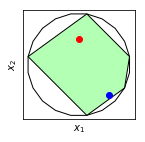

In [7]:
p_inner.include_point(sample_2)
p_inner_plot = Polytope(p_inner.hull.A, p_inner.hull.b)
p_inner_plot.assemble()
fig = plt.figure(figsize=(2.,2.))
p.plot(facecolor='w')
plt.scatter(sample_1[0,0], sample_1[1,0], color='r', zorder=2)
plt.scatter(sample_2[0,0], sample_2[1,0], color='b', zorder=2)
p_inner_plot.plot(facecolor=color)
plt.axis('equal')
plt.xticks([], [])
plt.yticks([], [])
fig = plt.gcf()
#fig.savefig('chm_'+str(i+4)+'.pdf', bbox_inches='tight')
plt.show()

Fake plot for the legend

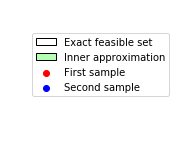

In [8]:
fig = plt.figure(figsize=(2.,2.))
p.plot(facecolor='w', label='Exact feasible set')
plt.scatter(sample_1[0,0], sample_1[1,0], color='r', label='First sample')
plt.scatter(sample_2[0,0], sample_2[1,0], color='b', label='Second sample')
p_inner_plot.plot(facecolor=color, label='Inner approximation')
p.plot(facecolor='w')
a = Polytope.from_bounds(-np.ones((2,1))*2., np.ones((2,1))*2.)
a.assemble()
a.plot(facecolor='w', edgecolor='w')
plt.axis('equal')
plt.legend(loc=10)
plt.axis('off')
fig = plt.gcf()
#fig.savefig('chm_legend.pdf', bbox_inches='tight')
plt.show()